<a href="https://colab.research.google.com/github/FizaAnwar/pfsintern/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# loading dataFrame to pandas DataFrame
credit_card_data= pd.read_csv('/content/creditcard.csv')

In [ ]:
# to view all columns of the dataset
pd.options.display.max_columns = None

In [ ]:
# print first 5 rows of the Dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# print last 5 rows of the dataset
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
# dataset information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# Find number of rows and columns
credit_card_data.shape

(284807, 31)

In [ ]:
print('Number of Rows=',credit_card_data.shape[0])
print('Number of Columns=',credit_card_data.shape[1])

Number of Rows= 284807
Number of Columns= 31


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#feature scaling on Amount column
sc=StandardScaler()
credit_card_data['Amount']=sc.fit_transform(pd.DataFrame(credit_card_data['Amount']))

In [ ]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [ ]:
credit_card_data =credit_card_data.drop(['Time'],axis=1)

In [ ]:
credit_card_data.shape

(284807, 30)

In [ ]:
credit_card_data.duplicated().any()

True

In [ ]:
credit_card_data=credit_card_data.drop_duplicates()

In [ ]:
credit_card_data.shape

(275663, 30)

In [ ]:
284807-275663

9144

In [ ]:
# distribution of legit transaction & fraudulent transaction
credit_card_data['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

This Dataset is highly unbalanced

0--> normal transaction


1--> fraudulent transaction

In [ ]:
# seperating the data for analysis
legit= credit_card_data[credit_card_data.Class == 0]
fraud=credit_card_data[credit_card_data.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(275190, 30)
(473, 30)


In [ ]:
#statistical measures of this data
legit.Amount.describe()

count    275190.000000
mean          0.008682
std           1.012309
min          -0.353229
25%          -0.327682
50%          -0.258275
75%          -0.033782
max         102.362243
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count    473.000000
mean       0.142021
std        1.040346
min       -0.353229
25%       -0.349231
50%       -0.313968
75%        0.070128
max        8.146182
Name: Amount, dtype: float64

In [ ]:
# compare the values for both transaction
credit_card_data.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.029792,-0.008288,0.037131,-0.012054,-0.005596,-0.011768,0.017497,-0.007346,-0.008050,0.012492,-0.013574,0.005134,0.000702,0.012432,-0.010208,0.002550,0.011589,0.007588,-0.000638,0.002717,0.001781,0.005689,-0.001779,-0.006696,-0.004890,-0.000327,0.001557,0.000771,0.008682
1,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,-5.453274,3.716347,-6.103254,-0.094324,-6.835946,-0.072830,-4.000956,-6.463285,-2.157071,0.669143,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,0.142021


Store Feature Matrix In X And Response (Target) in vector Y

In [ ]:
X = credit_card_data.drop(columns='Class',axis=1)
Y = credit_card_data['Class']

Split data into training data & Testing data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,stratify=Y,random_state=42)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(275663, 29) (220530, 29) (55133, 29)


UnderSampling


Build a sample dataset containing similar distribution of

---


normal transaction and Fraudulent transactions

In [ ]:
legit.shape

(275190, 30)

In [ ]:
fraud.shape

(473, 30)

Number of Fraudulent Transaction -->

In [ ]:
legit_sample = legit.sample(n=473)

In [ ]:
legit_sample.shape

(473, 30)

Concatenating Two DataFrames

In [ ]:
new_dataset = pd.concat([legit_sample, fraud],axis=0,ignore_index=True)

In [ ]:
new_dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,2.032706,-0.261652,-1.770754,0.079917,0.585279,-0.100214,0.157964,-0.097413,0.683132,0.051447,-0.434892,0.578425,-0.314091,0.517385,-0.644460,0.115020,-0.925148,0.311485,1.037144,-0.158724,-0.238544,-0.610922,0.030331,-1.414496,0.114845,-0.442471,-0.027682,-0.071573,-0.196504,0
1,1.134095,0.209325,0.134433,1.021836,-0.214639,-0.792952,0.288774,-0.056775,-0.243497,0.185019,1.174596,0.234609,-1.542927,1.009723,0.237482,0.260369,-0.521213,-0.003703,0.195046,-0.154157,-0.331593,-1.173863,0.116480,0.238222,0.312323,-0.758020,-0.016551,0.017185,-0.186749,0
2,0.013286,1.157746,-1.280704,1.751678,1.838348,5.181875,-2.893002,-4.201958,-0.966479,-0.333423,-1.016600,0.428392,-0.609387,0.854270,-0.748376,0.540415,-0.240760,0.101899,-0.144281,1.264722,-2.563461,0.725641,0.382800,0.986396,0.056717,0.035823,0.133598,0.311475,-0.342714,0
3,2.111213,-1.145636,-0.942246,-1.258141,-0.446304,0.544636,-1.138515,0.104827,-0.221396,0.882991,0.142950,0.276917,1.416502,-0.542451,-0.104795,1.874596,-0.742161,-0.184084,0.962474,0.214822,0.413264,1.115050,-0.028571,-0.284119,-0.054387,-0.061396,0.003338,-0.048031,-0.113344,0
4,-2.197951,2.129683,-0.685655,0.652212,-0.107211,-0.033008,0.244547,0.741498,0.632325,1.603567,-0.171400,0.539637,-0.514443,0.273753,-1.023295,-0.574020,-0.133673,0.635064,1.086038,0.493797,-0.031699,0.801897,-0.386877,-0.484301,0.146310,-0.388641,0.188182,-0.349713,-0.233287,0


In [ ]:
new_dataset.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
941,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.206024,1
942,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350191,1
943,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.041818,1
944,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.626302,1
945,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,0.491140,0.728903,0.380428,-1.948883,-0.832498,0.519436,0.903562,1.197315,0.593509,-0.017652,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,-0.183191,1


In [ ]:
new_dataset['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [ ]:
new_dataset.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.065244,-0.083122,0.040590,0.007101,-0.035719,0.030524,-0.027284,0.009500,-0.019447,0.060238,0.024954,0.000555,-0.020829,0.075193,-0.016974,0.020234,0.008697,0.009837,0.058681,0.122949,0.041993,0.045085,-0.017723,-0.000242,-0.040533,-0.058122,0.008138,0.018491,0.108802
1,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,-5.453274,3.716347,-6.103254,-0.094324,-6.835946,-0.072830,-4.000956,-6.463285,-2.157071,0.669143,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,0.142021


Splitting the data into Features & Target

In [ ]:
X = new_dataset.drop(columns='Class',axis=1)
Y = new_dataset['Class']

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,stratify=Y,random_state=42)

In [ ]:
print(X)

           V1        V2        V3        V4        V5        V6        V7  \
0    2.032706 -0.261652 -1.770754  0.079917  0.585279 -0.100214  0.157964   
1    1.134095  0.209325  0.134433  1.021836 -0.214639 -0.792952  0.288774   
2    0.013286  1.157746 -1.280704  1.751678  1.838348  5.181875 -2.893002   
3    2.111213 -1.145636 -0.942246 -1.258141 -0.446304  0.544636 -1.138515   
4   -2.197951  2.129683 -0.685655  0.652212 -0.107211 -0.033008  0.244547   
..        ...       ...       ...       ...       ...       ...       ...   
941 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494 -0.882850   
942  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536 -1.413170   
943 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346 -2.234739   
944 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548 -2.208002   
945  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695  0.223050   

           V8        V9       V10       V11       V12       V13       V14  

In [ ]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
941    1
942    1
943    1
944    1
945    1
Name: Class, Length: 946, dtype: int64


Logistic Regression

In [ ]:
log=LogisticRegression()
log.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
y_pred1=log.predict(X_test)

In [ ]:
# accuracy on Imbalanced dataset
Imbalanced_data_accuracy = accuracy_score(Y_test,y_pred1)
print("Imbalanced dataset accuracy is:",Imbalanced_data_accuracy)

Imbalanced dataset accuracy is: 0.9990931021348376


In [ ]:
# accuracy on dataset after undersampling
data_accuracy = accuracy_score(Y_test,y_pred1)
print(" dataset accuracy After Undersampling is:",data_accuracy)

 dataset accuracy After Undersampling is: 0.9421052631578948


In [ ]:
# precision score of Imbalanced dataset
Imbalanced_data_precision = precision_score(Y_test,y_pred1)
print("Imbalanced dataset precision score is:",Imbalanced_data_precision)

Imbalanced dataset precision score is: 0.8461538461538461


In [ ]:
# precision score on dataset after undersampling
data_precision = precision_score(Y_test,y_pred1)
print("dataset precision score after undersampling is:",data_precision)

dataset precision score after undersampling is: 0.9772727272727273


In [ ]:
# Recall score of Imbalanced dataset
Imbalanced_data_recall = recall_score(Y_test,y_pred1)
print("Imbalanced dataset recall score is:",Imbalanced_data_recall)

Imbalanced dataset recall score is: 0.5789473684210527


In [ ]:
# Recall score on dataset after undersampling
data_recall = recall_score(Y_test,y_pred1)
print("dataset recall score after undersampling is:",data_recall)

dataset recall score after undersampling is: 0.9052631578947369


In [ ]:
# F1 score of Imbalanced dataset
Imbalanced_data_F1 = f1_score(Y_test,y_pred1)
print("Imbalanced dataset  score is:",Imbalanced_data_F1)

Imbalanced dataset  score is: 0.6875


In [ ]:
# F1 score of dataset after undersampling
data_F1 = f1_score(Y_test,y_pred1)
print("dataset F1 score after undersampling is:",data_F1)

dataset F1 score after undersampling is: 0.9398907103825138


Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
y_pred2 = dt.predict(X_test)

In [ ]:
# accuracy on dataset
data_accuracy = accuracy_score(Y_test,y_pred2)
print(" dataset accuracy score is:",data_accuracy)

 dataset accuracy score is: 0.9210526315789473


In [ ]:
# precision score on dataset
data_precision = precision_score(Y_test,y_pred2)
print("dataset precision score is:",data_precision)

dataset precision score is: 0.9347826086956522


In [ ]:
# Recall score of dataset
data_recall = recall_score(Y_test,y_pred2)
print("dataset recall score is:",data_recall)

dataset recall score is: 0.9052631578947369


In [ ]:
# F1 score of dataset
data_F1 = f1_score(Y_test,y_pred2)
print("dataset F1 score is:",data_F1)

dataset F1 score is: 0.9197860962566845


Random Forest Classifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
y_pred3 = rf.predict(X_test)

In [ ]:
# accuracy on dataset
data_accuracy = accuracy_score(Y_test,y_pred3)
print(" dataset accuracy score is:",data_accuracy)

 dataset accuracy score is: 0.9315789473684211


In [ ]:
# precision score on dataset
data_precision = precision_score(Y_test,y_pred3)
print("dataset precision score is:",data_precision)

dataset precision score is: 0.9659090909090909


In [ ]:
# Recall score of dataset
data_recall = recall_score(Y_test,y_pred3)
print("dataset recall score is:",data_recall)

dataset recall score is: 0.8947368421052632


In [ ]:
# F1 score of dataset
data_F1 = f1_score(Y_test,y_pred3)
print("dataset F1 score is:",data_F1)

dataset F1 score is: 0.9289617486338798


In [ ]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
                           "ACC":[accuracy_score(Y_test,y_pred1)*100,
                                  accuracy_score(Y_test,y_pred2)*100,
                                  accuracy_score(Y_test,y_pred3)*100
                           ]})

In [ ]:
final_data

,Models,ACC
0,LR,94.210526
1,DT,92.105263
2,RF,93.157895


Logistic regression is the best model after undersampling

<Axes: >

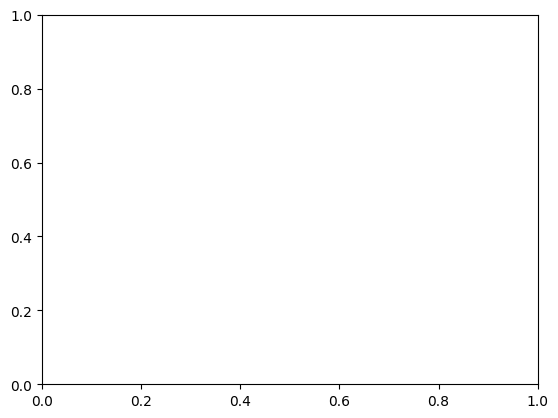

In [ ]:
import seaborn as sns
sns.barplot(X=final_data['Models'],Y=final_data['ACC'])

OverSampling

In [ ]:
X = credit_card_data.drop('Class',axis=1)
Y = credit_card_data['Class']

In [ ]:
X.shape

(275663, 29)

In [ ]:
Y.shape

(275663,)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_res,Y_res = SMOTE().fit_resample(X,Y)

In [ ]:
Y_res.value_counts()

0    275190
1    275190
Name: Class, dtype: int64

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X_res,Y_res,test_size=0.20,random_state=42)


Logistic Regression

In [ ]:
log = LogisticRegression()
log.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
y_pred1=log.predict(X_test)

In [ ]:
# accuracy score on dataset after oversampling
data_accuracy = accuracy_score(Y_test,y_pred1)
print("dataset accuracy is:",data_accuracy)

dataset accuracy is: 0.9446564192012791


In [ ]:
# precision score on dataset after oversampling
data_precision = precision_score(Y_test,y_pred1)
print("dataset accuracy is:",data_precision)

dataset accuracy is: 0.9734208335753141


In [ ]:
# recall score on dataset after oversampling
data_recall = recall_score(Y_test,y_pred1)
print("dataset accuracy is:",data_recall)

dataset accuracy is: 0.9142046797447412


In [ ]:
# f1 score on dataset after oversampling
data_f1 = f1_score(Y_test,y_pred1)
print("dataset accuracy is:",data_f1)

dataset accuracy is: 0.9428839302456403


Decision Tree

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
y_pred2=dt.predict(X_test)

In [ ]:
# accuracy score on dataset after oversampling
data_accuracy = accuracy_score(Y_test,y_pred2)
print("dataset accuracy is:",data_accuracy)

dataset accuracy is: 0.9984192739561757


In [ ]:
# precision score on dataset after oversampling
data_precision = precision_score(Y_test,y_pred2)
print("dataset precision is:",data_precision)

dataset precision is: 0.9977666817975488


In [ ]:
# recall score on dataset after oversampling
data_recall = recall_score(Y_test,y_pred2)
print("dataset recall score is:",data_recall)

dataset recall score is: 0.999072777848481


In [ ]:
# f1 score on dataset after oversampling
data_f1 = f1_score(Y_test,y_pred2)
print("dataset f1 score is:",data_f1)

dataset f1 score is: 0.9984193026762841


RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
y_pred3 = rf.predict(X_test)

In [ ]:
# accuracy score on dataset
data_accuracy = accuracy_score(Y_test,y_pred3)
print("dataset accuracy is:",data_accuracy)

dataset accuracy is: 0.9999364075729495


In [ ]:
# precision score on dataset
data_precision = precision_score(Y_test,y_pred3)
print("dataset precision is:",data_precision)

dataset precision is: 0.9998727504090166


In [ ]:
# recall score on dataset
data_recall = recall_score(Y_test,y_pred3)
print("dataset recall score is:",data_recall)

dataset recall score is: 1.0


In [ ]:
# f1 score on dataset after oversampling
data_f1 = f1_score(Y_test,y_pred3)
print("dataset f1 score is:",data_f1)

dataset f1 score is: 0.9999363711561361


In [ ]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
                           "ACC":[accuracy_score(Y_test,y_pred1)*100,
                                  accuracy_score(Y_test,y_pred2)*100,
                                  accuracy_score(Y_test,y_pred3)*100
                           ]})

In [ ]:
final_data

,Models,ACC
0,LR,94.465642
1,DT,99.841927
2,RF,99.993641


<Axes: xlabel='Models', ylabel='ACC'>

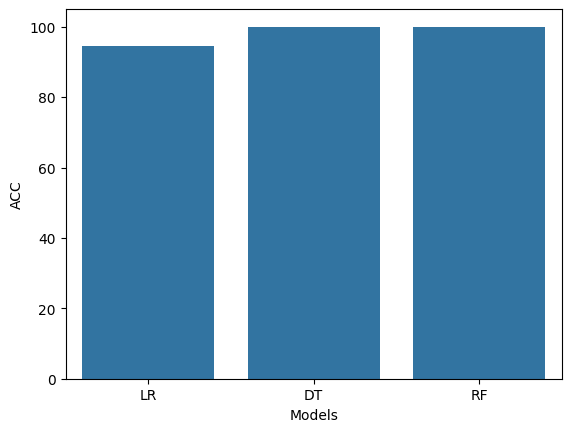

In [ ]:
sns.barplot(x=final_data['Models'],y=final_data['ACC'])

Save the model

In [ ]:
rf1 = RandomForestClassifier()
rf1.fit(X_res,Y_res)

RandomForestClassifier()

In [ ]:
import joblib

In [ ]:
joblib.dump(rf1,"credit_card_model")

['credit_card_model']

In [ ]:
model=joblib.load("credit_card_model")

In [ ]:
pred=model.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
if pred == 0 :
  print("Normal Transaction")
else:
  print("fraudulent Transaction")

Normal Transaction
